<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/Text-Preprocessing-Cleaning/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install emoji

In [ ]:
!pip install nltk

In [ ]:
!pip install tqdm textblob emoji

In [ ]:
!pip install tqdm

In [ ]:
!pip install nltk pandas scikit-learn matplotlib seaborn wordcloud emoji textblob rank_bm25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import emoji
import nltk
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import Counter

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1-Textual EDA

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ِFE/twitter_training copy.csv")

In [ ]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.dtypes

,0
Tweet ID,int64
Entity,object
Sentiment,object
Tweet content,object


In [ ]:
df = df[df['Sentiment'] != 'Sentiment']
df = df.dropna(subset=['Tweet content'])

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(73996, 4)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Tweet ID,0
Entity,0
Sentiment,0
Tweet content,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.sort_values(by=['Tweet ID'], inplace=True)

In [ ]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet content
4627,1,Amazon,Negative,7 @amazon wtf.
4626,1,Amazon,Negative,@amazon wtf?
4623,1,Amazon,Negative,@amazon wtf .
4628,1,Amazon,Negative,<unk> wtf.
4624,1,Amazon,Negative,@ amazon wtf.


In [ ]:
df.duplicated().sum()

np.int64(2341)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df[df['Sentiment'] != 'Irrelevant']
df = df.reset_index(drop=True)
print(df['Sentiment'].value_counts())

Sentiment
Negative    21698
Positive    19713
Neutral     17707
Name: count, dtype: int64


# 2-Text Preprocessing

In [ ]:
df.shape

(59118, 4)

In [ ]:
# Compile patterns for fast regex
url_pattern = re.compile(r"http\S+|www\S+|https\S+")
mention_pattern = re.compile(r'\@\w+')
hashtag_pattern = re.compile(r'\#')
special_chars_pattern = re.compile(r'[^a-zA-Z\s]')
digits_pattern = re.compile(r'\d+')
whitespace_pattern = re.compile(r'\s+')

# Define text cleaning function
def clean_text(text):
    text = str(text)
    text = emoji.demojize(text)  # Convert emoji to text
    text = text.lower()  # Lowercase
    text = url_pattern.sub('', text)  # Remove URLs
    text = mention_pattern.sub('', text)  # Remove mentions
    text = hashtag_pattern.sub('', text)  # Remove hashtags symbol
    text = special_chars_pattern.sub('', text)  # Remove special characters
    text = digits_pattern.sub('', text)  # Remove digits
    text = whitespace_pattern.sub(' ', text).strip()  # Normalize spaces
    return text

# Apply cleaning
tqdm.pandas()
df['cleaned_text'] = df['Tweet content'].progress_apply(clean_text)


100%|██████████| 59118/59118 [00:05<00:00, 10717.07it/s]


In [ ]:
df.shape

(59118, 5)

In [ ]:
df[['Tweet content', 'cleaned_text']].sample(5)

,Tweet content,cleaned_text
2303,"""you're not not diamond yet?""",youre not not diamond yet
10213,OK you fell like,ok you fell like
19747,I Absolutely,i absolutely
16383,Good morning! It was so hot and... gross last ...,good morning it was so hot and gross last sund...
27129,People dissing this but imo this is great from...,people dissing this but imo this is great from...


In [ ]:
df['cleaned_text'].isnull().sum()

np.int64(0)

In [ ]:
df[df['Tweet content'].str.contains('@|#|http|www|:')][['Tweet content', 'cleaned_text']].sample(5)

,Tweet content,cleaned_text
25238,Today went so cool. I decided the give outdoor...,today went so cool i decided the give outdoor ...
55491,Hey @amazon. @KraftHeinzCo. Then @BestBuy. @Pr...,hey then always soon eddie hey i get your to m...
33837,@EAMaddenNFL giive me my money back. Your game...,giive me my money back your game is broken yal...
10829,One of its own movies is live w/ @ProfZeroo 3!...,one of its own movies is live w catch him from...
8948,The recent Warzone and Modern Warfare patch ha...,the recent warzone and modern warfare patch ha...


In [ ]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet content,cleaned_text
0,1,Amazon,Negative,7 @amazon wtf.,wtf
1,1,Amazon,Negative,@amazon wtf?,wtf
2,1,Amazon,Negative,@amazon wtf .,wtf
3,1,Amazon,Negative,<unk> wtf.,unk wtf
4,1,Amazon,Negative,@ amazon wtf.,amazon wtf


In [ ]:
df[['Tweet content', 'cleaned_text']].head(100)

,Tweet content,cleaned_text
0,7 @amazon wtf.,wtf
1,@amazon wtf?,wtf
2,@amazon wtf .,wtf
3,<unk> wtf.,unk wtf
4,@ amazon wtf.,amazon wtf
...,...,...
95,Amazon Bestseller: Best Sports Collectibles if...,amazon bestseller best sports collectibles ift...
96,Amazon Bestsellers: Best Sports Includes i.tt ...,amazon bestsellers best sports includes itt vp...
97,BUDDY LOVE: More about: Amazon.com / stores / ...,buddy love more about amazoncom stores buddylo...
98,<unk> LOVE: More from amazon.com/stores/BUDDYL...,unk love more from amazoncomstoresbuddylo the ...


# 3-Lemmatization

In [ ]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Download the required resource for the pos_tag function
# Original line: nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Download the specific 'eng' resource

# Setup Lemmatizer
lemmatizer = WordNetLemmatizer()

# Mapping POS tags to WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

# Lemmatization function
def lemmatize_text(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(lemmatized_words)

# Apply lemmatization
df['lemmatized_text'] = df['cleaned_text'].progress_apply(lemmatize_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
100%|██████████| 59118/59118 [00:48<00:00, 1208.65it/s]


In [ ]:
df[['cleaned_text', 'lemmatized_text']].sample(20)

,cleaned_text,lemmatized_text
37486,every where and then i start to reconsider my ...,every where and then i start to reconsider my ...
58278,good to see microsoft is gonna release the xbo...,good to see microsoft be gon na release the xb...
11060,my fave games are minecraft borderlands forza ...,my fave game be minecraft borderland forza hor...
15968,chapter update chase emailed me from behind an...,chapter update chase email me from behind an a...
52342,this is disgusting because i had played matche...,this be disgust because i have play match each...
17881,cyberpunks not there yet just told magda that ...,cyberpunk not there yet just tell magda that i...
17525,as a reward for the th of july i preordered cy...,a a reward for the th of july i preordered cyb...
43882,interventionist shit,interventionist shit
454,amazon threatens to fire critics who are outsp...,amazon threaten to fire critic who be outspoke...
40975,start your journey with strong partnerships hp...,start your journey with strong partnership hpe...


# 5-stopwords

In [ ]:
# Import standard English stopwords
from nltk.corpus import stopwords

# Load standard English stopwords
stop_words = set(stopwords.words('english'))


In [ ]:
# Define additional custom stopwords (specific to your Twitter data)
custom_noise_words = set([
    'im', 'dont', 'cant', 'couldnt', 'wouldnt', 'shouldnt', 'wasnt', 'isnt', 'arent',
    'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them',
    'am', 'is', 'are', 'was', 'were', 'do', 'does', 'did', 'have', 'has', 'had',
    'get', 'got', 'still', 'also', 'even', 'really', 'one', 'two', 'three', 'four',
    'five', 'six', 'seven', 'eight', 'nine', 'ten', 'day', 'week', 'month', 'year',
    'game', 'play', 'go', 'make', 'time', 'see', 'look', 'like', 'new', 'u', 'people', 'player'
    'could', 'would', 'should', 'may', 'might', 'must',
    'one', 'two', 'three', 'four', 'five', 'also', 'even',
    'get', 'got', 'im', 'amp', 'u', 'ur', 'dont', 'doesnt', 'didnt'
    ,'k', 'ur', 'amp', 'via', 'pictwittercom',"p"

])

In [ ]:
# Merge standard stopwords with custom noise words
full_stopwords = stop_words.union(custom_noise_words)

In [ ]:
# Define the stopwords removal function
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in full_stopwords]
    return ' '.join(filtered_words)


In [ ]:
# Apply stopwords removal on the lemmatized text
df['final_text'] = df['lemmatized_text'].progress_apply(remove_stopwords)

100%|██████████| 59118/59118 [00:00<00:00, 322317.93it/s]


In [ ]:
def remove_mentions(text):
    words = text.split()
    words = [word for word in words if not word.startswith('@')]
    return ' '.join(words)

# Apply to your preprocessed text
df['final_text'] = df['final_text'].apply(remove_mentions)


In [ ]:
df[['lemmatized_text', 'final_text']].sample(10)

,lemmatized_text,final_text
25864,home depot recently stop hire and they not run...,home depot recently stop hire run background c...
23107,tired hearthstone wire pictwittercomdcfxhdnc,tired hearthstone wire pictwittercomdcfxhdnc
21096,more evidence of left wingunk scamming,evidence left wingunk scamming
46249,why be u do nothing in pakistan against pubg b...,nothing pakistan pubg ban come please issue cl...
5087,god i forget how hot i fuck love assassin cree...,god forget hot fuck love assassin creed fuck
35620,be a sweet guy ragequits it freeze the screen ...,sweet guy ragequits freeze screen force close ...
20013,might just pay for the extra google drive spac...,pay extra google drive space keep real
45938,miss u pubg,miss pubg
46125,indian government ban pubg pro pubg player str...,indian government ban pubg pro pubg player str...
15890,could indeed,could indeed


# 4-Extract Top 150 Terms Based on Term Frequency (TF)

In [ ]:
# prompt: 4-Extract Top 150 Terms Based on Term Frequency (TF)

from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = Counter()
    for text in corpus:
        for word in text.split():
            vec[word] += 1
    return vec.most_common(n)

top_150_words = get_top_n_words(df['final_text'], 150)
top_150_words


[('good', 3299),
 ('fuck', 2904),
 ('love', 2868),
 ('johnson', 2860),
 ('shit', 2252),
 ('say', 1966),
 ('great', 1953),
 ('bad', 1936),
 ('best', 1849),
 ('work', 1833),
 ('amazon', 1801),
 ('dead', 1748),
 ('rhandlerr', 1730),
 ('want', 1692),
 ('xbox', 1682),
 ('please', 1680),
 ('know', 1680),
 ('come', 1677),
 ('microsoft', 1660),
 ('back', 1641),
 ('fix', 1638),
 ('red', 1599),
 ('think', 1587),
 ('google', 1576),
 ('facebook', 1566),
 ('take', 1559),
 ('much', 1548),
 ('home', 1532),
 ('call', 1518),
 ('try', 1478),
 ('buy', 1447),
 ('win', 1442),
 ('ive', 1429),
 ('verizon', 1401),
 ('wait', 1396),
 ('first', 1395),
 ('use', 1384),
 ('fifa', 1380),
 ('fun', 1321),
 ('unk', 1316),
 ('guy', 1301),
 ('today', 1278),
 ('well', 1278),
 ('watch', 1269),
 ('video', 1250),
 ('nvidia', 1249),
 ('player', 1242),
 ('thing', 1236),
 ('x', 1229),
 ('need', 1227),
 ('ever', 1223),
 ('help', 1211),
 ('give', 1208),
 ('thank', 1161),
 ('every', 1155),
 ('redemption', 1149),
 ('never', 1135),


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))
X2 = vectorizer.fit_transform(df['final_text'])
sum_words2 = X2.sum(axis=0)
words_freq2 = [(word, sum_words2[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_150_bigrams = sorted(words_freq2, key=lambda x: x[1], reverse=True)[:150]

# عرض النتائج
for word, freq in top_150_bigrams:
    print(word, freq)


red dead 1319
johnson johnson 1214
dead redemption 1047
home depot 960
assassin creed 688
call duty 670
rhandlerr rhandlerr 660
gon na 633
xbox series 584
league legend 580
italy italy 475
black ops 457
access health 417
cold war 383
baby powder 382
world warcraft 315
ops cold 295
health care 287
wan na 270
chance win 240
please fix 211
watch video 168
apex legend 159
much fun 157
gift card 156
johnson stop 155
last night 151
covid vaccine 148
win amazon 147
creed odyssey 147
amazon gift 141
another chance 140
eu commission 140
commission take 140
take step 140
health service 140
first eu 139
despite fact 139
fact currently 139
currently million 139
million live 139
live poverty 139
poverty line 139
line access 139
service access 139
care access 139
please help 137
summoners watch 131
modern warfare 126
ghost recon 124
ive ever 122
feel good 119
stop sell 118
video win 115
pubg mobile 113
grand summoners 111
holy shit 111
customer service 110
amazon try 109
powder canada 109
try luck 1

In [ ]:
df.columns

Index(['Tweet ID', 'Entity', 'Sentiment', 'Tweet content', 'cleaned_text',
       'lemmatized_text', 'final_text', 'original_text'],
      dtype='object')

In [ ]:
df['Sentiment'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
import pandas as pd
from collections import Counter


df['original_text'] = df['Tweet content']


def get_top_unigrams_with_original(df, sentiment_label=None, n=170):
    if sentiment_label:
        subset = df[df['Sentiment'] == sentiment_label]
    else:
        subset = df.copy()


    original_texts = ' '.join(subset['original_text'].dropna()).lower()
    cleaned_texts = ' '.join(subset['final_text'].dropna())


    cleaned_counter = Counter(cleaned_texts.split())
    original_counter = Counter(original_texts.split())

    top_cleaned = cleaned_counter.most_common(n)


    records = []
    for cleaned_word, freq in top_cleaned:
        matching_original = [word for word in original_counter if cleaned_word in word]
        original_word = matching_original[0] if matching_original else cleaned_word
        records.append([original_word, cleaned_word, freq])

    result_df = pd.DataFrame(records, columns=["Original terms", "Terms after pre-processing", "TF"])
    return result_df


df_top150_all = get_top_unigrams_with_original(df)


df_top150_positive = get_top_unigrams_with_original(df, 'Positive')
df_top150_negative = get_top_unigrams_with_original(df, 'Negative')
df_top150_irrelevant = get_top_unigrams_with_original(df, 'Irrelevant')



In [ ]:
print(" Top 150 Unigrams in ALL Data")
display(df_top150_all)

 Top 150 Unigrams in ALL Data


,Original terms,Terms after pre-processing,TF
0,good,good,3299
1,fucked,fuck,2904
2,love,love,2868
3,johnson,johnson,2860
4,shit,shit,2252
...,...,...,...
165,@biohazzards,oh,570
166,top,top,559
167,they,hey,554
168,nothing,nothing,553


In [ ]:
# Add the following lines to define and display df_top150_neutral:
df_top150_neutral = get_top_unigrams_with_original(df, 'Neutral')  # Assuming 'Neutral' is the correct label
print(" Top 150 Unigrams in Neutral Tweets")
display(df_top150_neutral)

 Top 150 Unigrams in Neutral Tweets


,Original terms,Terms after pre-processing,TF
0,johnson,johnson,1793
1,amazon,amazon,1107
2,google,google,820
3,facebook,facebook,809
4,win!...,win,795
...,...,...,...
165,luck,luck,166
166,entering,enter,165
167,everything,everything,164
168,always,always,162


In [ ]:
print(" Top 150 Unigrams in Negative Tweets")
display(df_top150_negative)

 Top 150 Unigrams in Negative Tweets


,Original terms,Terms after pre-processing,TF
0,fucked,fuck,1982
1,"shit,",shit,1488
2,fix,fix,1430
3,bad,bad,1181
4,please,please,1112
...,...,...,...
165,bluescreened,screen,229
166,almost,almost,228
167,@ghostrecon,ghostrecon,227
168,yet,yet,224


In [ ]:
print(" Top 150 Unigrams in Neutral Tweets")
display(df_top150_neutral)

 Top 150 Unigrams in Neutral Tweets


,Original terms,Terms after pre-processing,TF
0,johnson,johnson,1793
1,amazon,amazon,1107
2,google,google,820
3,facebook,facebook,809
4,win!...,win,795
...,...,...,...
165,luck,luck,166
166,entering,enter,165
167,everything,everything,164
168,always,always,162


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_bigrams_with_original(df, sentiment_label=None, n=170):
    if sentiment_label:
        subset = df[df['Sentiment'] == sentiment_label]
    else:
        subset = df.copy()

    # Check if the subset is empty after filtering for sentiment
    if subset.empty:
        print(f"No data found for sentiment: {sentiment_label}")
        return pd.DataFrame(columns=["Original terms", "Terms after pre-processing", "2 grams Weight"]) # Return empty DataFrame if no data

    original_texts = subset['original_text'].dropna().tolist()
    cleaned_texts = subset['final_text'].dropna().tolist()


    vectorizer = CountVectorizer(ngram_range=(2, 2))

    # Check if cleaned_texts is empty before fitting
    if not cleaned_texts or all(not text.strip() for text in cleaned_texts):
        print(f"All texts for sentiment '{sentiment_label}' are empty after preprocessing.")
        return pd.DataFrame(columns=["Original terms", "Terms after pre-processing", "2 grams Weight"])

    X_cleaned = vectorizer.fit_transform(cleaned_texts)
    sum_words = X_cleaned.sum(axis=0)
    cleaned_2grams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    top_cleaned_2grams = sorted(cleaned_2grams_freq, key=lambda x: x[1], reverse=True)[:n]

    records = []

    for cleaned_bigram, freq in top_cleaned_2grams:
        cleaned_words = cleaned_bigram.split()


        matching_original = []
        for word in cleaned_words:
            for text in original_texts:
                words = text.lower().split()
                if word in words:
                    matching_original.append(word)
                    break
            else:
                matching_original.append(word)
        original_bigram = ' '.join(matching_original)
        records.append([original_bigram, cleaned_bigram, freq])

    result_df = pd.DataFrame(records, columns=["Original terms", "Terms after pre-processing", "2 grams Weight"])
    return result_df

df_bigrams_all = get_top_bigrams_with_original(df)


df_bigrams_positive = get_top_bigrams_with_original(df, 'Positive')
df_bigrams_negative = get_top_bigrams_with_original(df, 'Negative')
df_bigrams_neutral = get_top_bigrams_with_original(df, 'Neutral')
df_bigrams_irrelevant = get_top_bigrams_with_original(df, 'Irrelevant')


print(" Top 150 2-grams in ALL Data")
display(df_bigrams_all)

print(" Top 150 2-grams in Positive Tweets")
display(df_bigrams_positive)

print(" Top 150 2-grams in Negative Tweets")
display(df_bigrams_negative)

print(" Top 150 2-grams in Neutral Tweets")
display(df_bigrams_neutral)



No data found for sentiment: Irrelevant
 Top 150 2-grams in ALL Data


,Original terms,Terms after pre-processing,2 grams Weight
0,red dead,red dead,1319
1,johnson johnson,johnson johnson,1214
2,dead redemption,dead redemption,1047
3,home depot,home depot,960
4,assassin creed,assassin creed,688
...,...,...,...
165,best thing,best thing,50
166,black flag,black flag,50
167,microsoft edge,microsoft edge,50
168,sell baby,sell baby,50


 Top 150 2-grams in Positive Tweets


,Original terms,Terms after pre-processing,2 grams Weight
0,red dead,red dead,580
1,assassin creed,assassin creed,522
2,dead redemption,dead redemption,488
3,home depot,home depot,325
4,gon na,gon na,313
...,...,...,...
165,spend money,spend money,18
166,king canyon,king canyon,18
167,creed origin,creed origin,18
168,na buy,na buy,18


 Top 150 2-grams in Negative Tweets


,Original terms,Terms after pre-processing,2 grams Weight
0,home depot,home depot,408
1,johnson johnson,johnson johnson,335
2,call duty,call duty,299
3,rhandlerr rhandlerr,rhandlerr rhandlerr,266
4,league legend,league legend,215
...,...,...,...
165,abandon sanction,abandon sanction,23
166,verizon fios,verizon fios,23
167,work hard,work hard,22
168,account hack,account hack,22


 Top 150 2-grams in Neutral Tweets


,Original terms,Terms after pre-processing,2 grams Weight
0,johnson johnson,johnson johnson,736
1,red dead,red dead,537
2,dead redemption,dead redemption,409
3,xbox series,xbox series,273
4,baby powder,baby powder,263
...,...,...,...
165,high hr,high hr,22
166,evax humbly,evax humbly,22
167,much love,much love,21
168,russian bot,russian bot,21


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_bigrams_with_original(df, sentiment_label=None, n=170):
    if sentiment_label:
        subset = df[df['Sentiment'] == sentiment_label]
    else:
        subset = df.copy()

    # Check if the subset is empty after filtering for sentiment
    if subset.empty:
        print(f"No data found for sentiment: {sentiment_label}")
        return pd.DataFrame(columns=["Original terms", "Terms after pre-processing", "2 grams Weight"]) # Return empty DataFrame

    original_texts = subset['original_text'].dropna().tolist()
    cleaned_texts = subset['final_text'].dropna().tolist()


    vectorizer = CountVectorizer(ngram_range=(2, 2))
    X_cleaned = vectorizer.fit_transform(cleaned_texts)
    sum_words = X_cleaned.sum(axis=0)
    cleaned_2grams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    top_cleaned_2grams = sorted(cleaned_2grams_freq, key=lambda x: x[1], reverse=True)[:n]

    records = []

    for cleaned_bigram, freq in top_cleaned_2grams:
        cleaned_words = cleaned_bigram.split()


        matching_original = []
        for word in cleaned_words:
            for text in original_texts:
                words = text.lower().split()
                if word in words:
                    matching_original.append(word)
                    break
            else:
                matching_original.append(word)
        original_bigram = ' '.join(matching_original)
        records.append([original_bigram, cleaned_bigram, freq])

    result_df = pd.DataFrame(records, columns=["Original terms", "Terms after pre-processing", "2 grams Weight"])
    return result_df


df_bigrams_all = get_top_bigrams_with_original(df)


df_bigrams_positive = get_top_bigrams_with_original(df, 'Positive')
df_bigrams_negative = get_top_bigrams_with_original(df, 'Negative')
df_bigrams_neutral = get_top_bigrams_with_original(df, 'Neutral')
df_bigrams_irrelevant = get_top_bigrams_with_original(df, 'Irrelevant') # This line will now print a message and return an empty DataFrame


print(" Top 150 2-grams in ALL Data")
display(df_bigrams_all)

print(" Top 150 2-grams in Positive Tweets")
display(df_bigrams_positive)

print(" Top 150 2-grams in Negative Tweets")
display(df_bigrams_negative)

print(" Top 150 2-grams in Neutral Tweets")
display(df_bigrams_neutral)

No data found for sentiment: Irrelevant
 Top 150 2-grams in ALL Data


,Original terms,Terms after pre-processing,2 grams Weight
0,red dead,red dead,1319
1,johnson johnson,johnson johnson,1214
2,dead redemption,dead redemption,1047
3,home depot,home depot,960
4,assassin creed,assassin creed,688
...,...,...,...
165,best thing,best thing,50
166,black flag,black flag,50
167,microsoft edge,microsoft edge,50
168,sell baby,sell baby,50


 Top 150 2-grams in Positive Tweets


,Original terms,Terms after pre-processing,2 grams Weight
0,red dead,red dead,580
1,assassin creed,assassin creed,522
2,dead redemption,dead redemption,488
3,home depot,home depot,325
4,gon na,gon na,313
...,...,...,...
165,spend money,spend money,18
166,king canyon,king canyon,18
167,creed origin,creed origin,18
168,na buy,na buy,18


 Top 150 2-grams in Negative Tweets


,Original terms,Terms after pre-processing,2 grams Weight
0,home depot,home depot,408
1,johnson johnson,johnson johnson,335
2,call duty,call duty,299
3,rhandlerr rhandlerr,rhandlerr rhandlerr,266
4,league legend,league legend,215
...,...,...,...
165,abandon sanction,abandon sanction,23
166,verizon fios,verizon fios,23
167,work hard,work hard,22
168,account hack,account hack,22


 Top 150 2-grams in Neutral Tweets


,Original terms,Terms after pre-processing,2 grams Weight
0,johnson johnson,johnson johnson,736
1,red dead,red dead,537
2,dead redemption,dead redemption,409
3,xbox series,xbox series,273
4,baby powder,baby powder,263
...,...,...,...
165,high hr,high hr,22
166,evax humbly,evax humbly,22
167,much love,much love,21
168,russian bot,russian bot,21


In [ ]:
import os

fe_folder = '/content/drive/MyDrive/FE11111'
os.makedirs(fe_folder, exist_ok=True)


def save_table_to_drive(df, filename):
    filepath = os.path.join(fe_folder, filename)
    df.to_csv(filepath, index=False)
    print(f"Saved: {filepath}")


save_table_to_drive(df_top150_all, 'top150_unigrams_all.csv')


save_table_to_drive(df_top150_positive, 'top150_unigrams_positive.csv')
save_table_to_drive(df_top150_negative, 'top150_unigrams_negative.csv')
save_table_to_drive(df_top150_neutral, 'top150_unigrams_neutral.csv')
save_table_to_drive(df_top150_irrelevant, 'top150_unigrams_irrelevant.csv')


save_table_to_drive(df_bigrams_all, 'top150_bigrams_all.csv')


save_table_to_drive(df_bigrams_positive, 'top150_bigrams_positive.csv')
save_table_to_drive(df_bigrams_negative, 'top150_bigrams_negative.csv')
save_table_to_drive(df_bigrams_neutral, 'top150_bigrams_neutral.csv')

Saved: /content/drive/MyDrive/FE11111/top150_unigrams_all.csv
Saved: /content/drive/MyDrive/FE11111/top150_unigrams_positive.csv
Saved: /content/drive/MyDrive/FE11111/top150_unigrams_negative.csv
Saved: /content/drive/MyDrive/FE11111/top150_unigrams_neutral.csv
Saved: /content/drive/MyDrive/FE11111/top150_unigrams_irrelevant.csv
Saved: /content/drive/MyDrive/FE11111/top150_bigrams_all.csv
Saved: /content/drive/MyDrive/FE11111/top150_bigrams_positive.csv
Saved: /content/drive/MyDrive/FE11111/top150_bigrams_negative.csv
Saved: /content/drive/MyDrive/FE11111/top150_bigrams_neutral.csv


In [ ]:
import plotly.express as px


def plot_top_words_full(df, title):
    fig = px.bar(
        df,
        x='Terms after pre-processing',
        y='TF',
        title=title,
        text='TF',
        labels={'Terms after pre-processing': 'Word', 'TF': 'Count'},
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(
        xaxis_tickangle=-90,
        plot_bgcolor='white',
        title_x=0.5,
        font=dict(size=12),
        height=1000,
        width=1500,
        margin=dict(l=20, r=20, t=50, b=200)
    )
    fig.show()


plot_top_words_full(df_top150_positive, "Top 150 Words - Positive Tweets") # Changed variable name to df_top150_positive
plot_top_words_full(df_top150_negative, "Top 150 Words - Negative Tweets") # Changed variable name to df_top150_negative
plot_top_words_full(df_top150_neutral, "Top 150 Words - Neutral Tweets") # Changed variable name to df_top150_neutral

In [ ]:
import plotly.express as px

def plot_top_bigrams_full(df, title):
    fig = px.bar(
        df,
        x='Terms after pre-processing',
        y='2 grams Weight',
        title=title,
        text='2 grams Weight',
        labels={'Terms after pre-processing': '2-gram', '2 grams Weight': 'Count'},
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(
        xaxis_tickangle=-90,
        plot_bgcolor='white',
        title_x=0.5,
        font=dict(size=12),
        height=1000,
        width=1500,
        margin=dict(l=20, r=20, t=50, b=200)
    )
    fig.show()


plot_top_bigrams_full(df_bigrams_positive, "Top 150 2-grams - Positive Tweets")
plot_top_bigrams_full(df_bigrams_negative, "Top 150 2-grams - Negative Tweets")
plot_top_bigrams_full(df_bigrams_neutral, "Top 150 2-grams - Neutral Tweets")


In [ ]:
from sklearn.model_selection import train_test_split


X = df['final_text']
y = df['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Display shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (47294,)
Testing data shape: (11824,)


In [ ]:
# Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)

# Fit the vectorizer on the training data and transform both train and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Display the shapes
print(f"TF-IDF train shape: {X_train_tfidf.shape}")
print(f"TF-IDF test shape: {X_test_tfidf.shape}")


TF-IDF train shape: (47294, 5000)
TF-IDF test shape: (11824, 5000)


In [ ]:
# Import required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Naive Bayes Model Evaluation:
Accuracy: 0.6952807848443843

Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.81      0.74      4340
     Neutral       0.71      0.52      0.60      3541
    Positive       0.70      0.73      0.71      3943

    accuracy                           0.70     11824
   macro avg       0.70      0.69      0.69     11824
weighted avg       0.70      0.70      0.69     11824



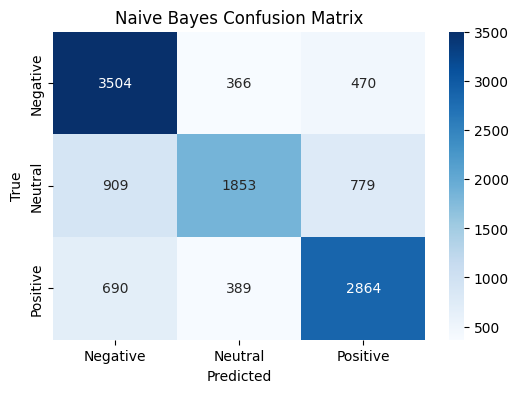

In [ ]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes model
print("Naive Bayes Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Plot confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression Model Evaluation:
Accuracy: 0.7328315290933695

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.81      0.77      4340
     Neutral       0.71      0.64      0.67      3541
    Positive       0.75      0.73      0.74      3943

    accuracy                           0.73     11824
   macro avg       0.73      0.73      0.73     11824
weighted avg       0.73      0.73      0.73     11824



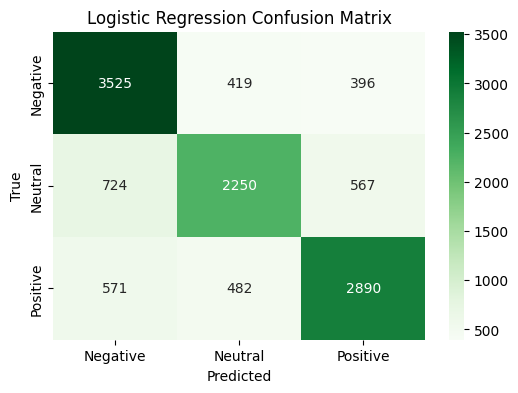

In [ ]:

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Plot confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
